In [1]:
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 63.1 MB/s eta 0:00:00


In [2]:
# Bibliotecas
import matplotlib.pyplot as plt
from skimage.filters import threshold_minimum
import numpy as np
import rasterio as rio
from rasterio.plot import reshape_as_image
import numpy.ma as ma

In [3]:
# Leitura dos arquivos
src1 = rio.open('/content/drive/MyDrive/SBSR/Cubo_SBSR_cut1.tif')
img = reshape_as_image(src1.read())

In [4]:
# Criando máscara em nodata
masked = ma.masked_equal(img,-9999.0)

In [5]:
# Aplicando threshold
thresh = threshold_minimum(masked[...,0].compressed())
bin = masked[...,0] < thresh

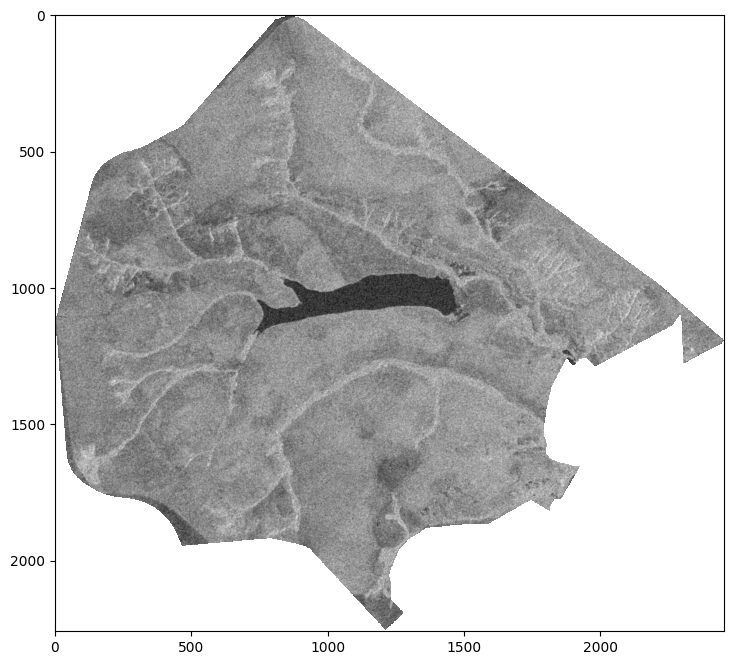

In [6]:
# Visualizando imagem
plt.figure(figsize=(12,8))
plt.imshow(masked[...,0], cmap='gray')
plt.show()

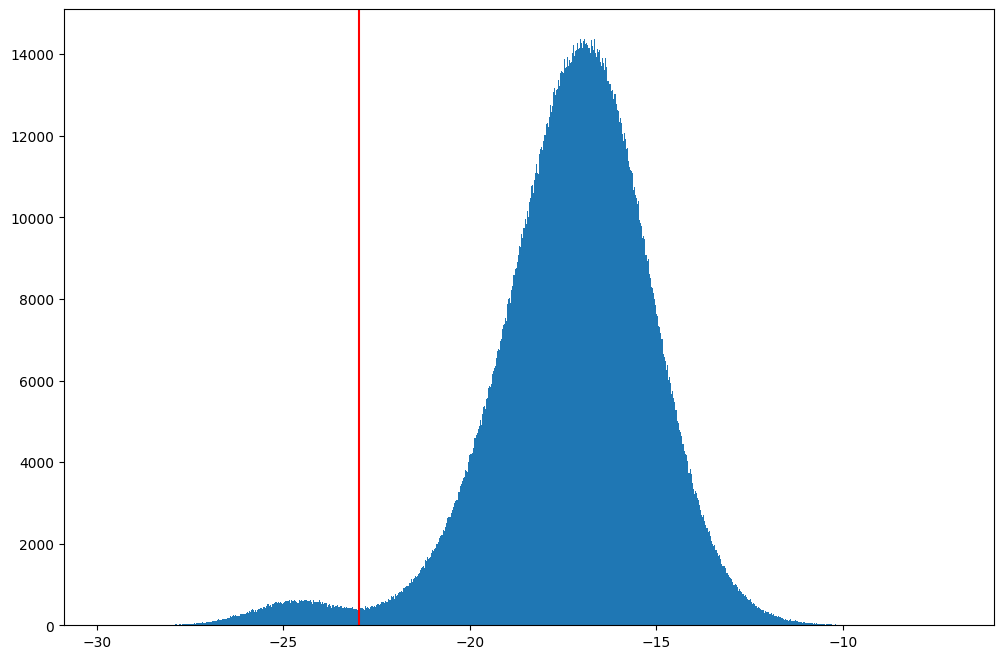

In [7]:
# Visualizando threshold
plt.figure(figsize=(12,8))
plt.hist(masked[...,0].flatten(), bins=1000)
plt.axvline(thresh, color='r')
plt.show()

In [9]:
# Aplicando threshold em cada banda
thresholds = []
bins = []

for band in range(masked.shape[2]):
    thresh = threshold_minimum(masked[...,band].compressed())
    thresholds.append(thresh)
    bin_band = masked[...,band] < thresh
    bins.append(bin_band)

# Calculando área dos pixels menores que o threshold
area_pixel = 100  # Área de cada pixel em metros quadrados
areas = []

for bin_band in bins:
    area_pixels_menor_que_thresh = np.sum(bin_band) * area_pixel
    areas.append(area_pixels_menor_que_thresh)

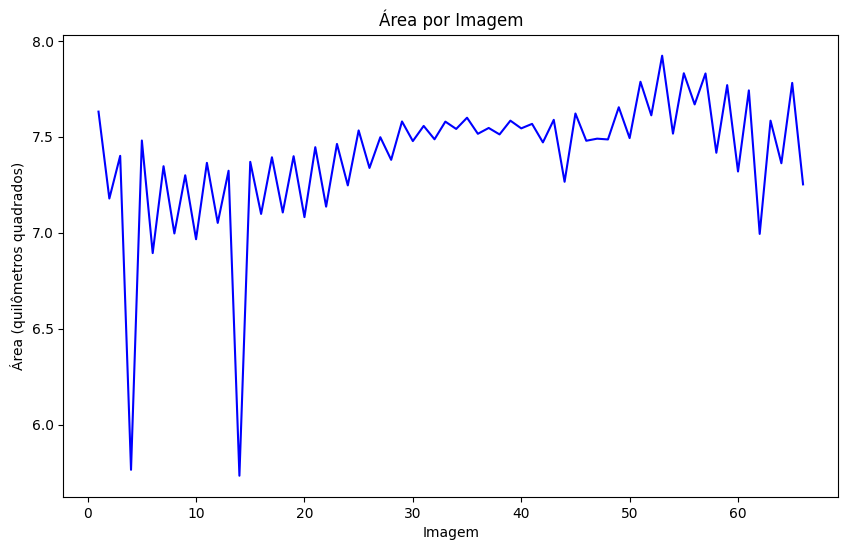

In [10]:
# Visualizando gráfico de barras com a área por banda
fig, ax = plt.subplots(figsize=(10, 6))
bandas = np.arange(1, len(areas) + 1)

# Convertendo áreas para quilômetros quadrados
areas_km2 = np.array(areas) / 1e6  # Convertendo metros quadrados para quilômetros quadrados
ax.plot(bandas, areas_km2, color='blue')
ax.set_xlabel('Imagem')
ax.set_ylabel('Área (quilômetros quadrados)')
ax.set_title('Área por Imagem')
plt.show()